In [2]:
pip install geopandas

In [3]:
pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 49.4 MB/s eta 0:00:00


In [4]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.7 MB/s eta 0:00:00


In [5]:
pip install Pillow

In [7]:
pip install netcdf

  Preparing metadata (setup.py) ... done
  Created wheel for netcdf: filename=netcdf-66.0.2-py3-none-any.whl size=1140 sha256=624dcc99eaaee77640e7fe28d05932fd0c88da7530263ba7e662f94df7c99e92
  Stored in directory: /root/.cache/pip/wheels/13/2e/52/ae430c0aa0f273d39a049a1ae9b7ff7df726f45b4d3bf58548
Successfully built netcdf


In [30]:
pip install lidario

  Preparing metadata (setup.py) ... done
  Created wheel for lidario: filename=lidario-0.3.0-py3-none-any.whl size=8001 sha256=7603e394bee046eb6d512cca84e9d48108818d5d3b3325025061dc85e1ec0754
  Stored in directory: /root/.cache/pip/wheels/70/1e/4e/76bdfc04d0b761169a319de87cbf4f4c88dc28426f25915f46
Successfully built lidario


In [50]:
pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbf

In [51]:
from scipy.io import netcdf
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt
import lidario as lio
import open3d as o3d

In [52]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

# Get data and set working directory
# et.data.get_data("")
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [53]:
# Read the data in and call it lidar_dtm (this is the variable name)
lidar_dtm = rxr.open_rasterio('/content/TA12se_FZ_DSM_1m.tif', masked=True)

In [54]:
!pip install Pillow

In [55]:
from PIL import Image

# Replace 'your_image.tif' with the path to your TIF file
file_path = '/content/TA12se_FZ_DSM_1m.tif'

# Open the TIF file
image = Image.open(file_path)

# Display the image
image.show()

In [56]:
# Create a path to file
lidar_dsm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "/content/TA12se_FZ_DSM_1m.tif")
lidar_dsm_path

'/content/TA12se_FZ_DSM_1m.tif'

In [57]:
# Open and read in the digital terrain model
# Note that rxr is the alias for rioxarray
lidar_dsm = rxr.open_rasterio('/content/TA12se_FZ_DSM_1m.tif', masked=True)

# View the data - notice the data structure is different from geopandas data
# which you explored in the last lesson
lidar_dsm

<xarray.DataArray (band: 1, y: 5000, x: 5000)>
[25000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.15e+05 5.15e+05 5.15e+05 ... 5.2e+05 5.2e+05
  * y            (y) float64 4.25e+05 4.25e+05 4.25e+05 ... 4.2e+05 4.2e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    RepresentationType:      ATHEMATIC
    STATISTICS_COVARIANCES:  2.600767689750382
    STATISTICS_MAXIMUM:      44.185001373291
    STATISTICS_MEAN:         2.5877375272419
    STATISTICS_MINIMUM:      0.34000000357628
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1.6126895825764
    scale_factor:            1.0
    add_offset:              0.0

In [58]:
type(lidar_dsm)

xarray.core.dataarray.DataArray

In [59]:
# View the min and max values of the array
print(lidar_dsm.min(), lidar_dsm.max())

<xarray.DataArray ()>
array(0.34, dtype=float32)
Coordinates:
    spatial_ref  int64 0 <xarray.DataArray ()>
array(44.185, dtype=float32)
Coordinates:
    spatial_ref  int64 0


In [60]:
# View the dimensions of the array (rows, columns)
lidar_dsm.shape

(1, 5000, 5000)

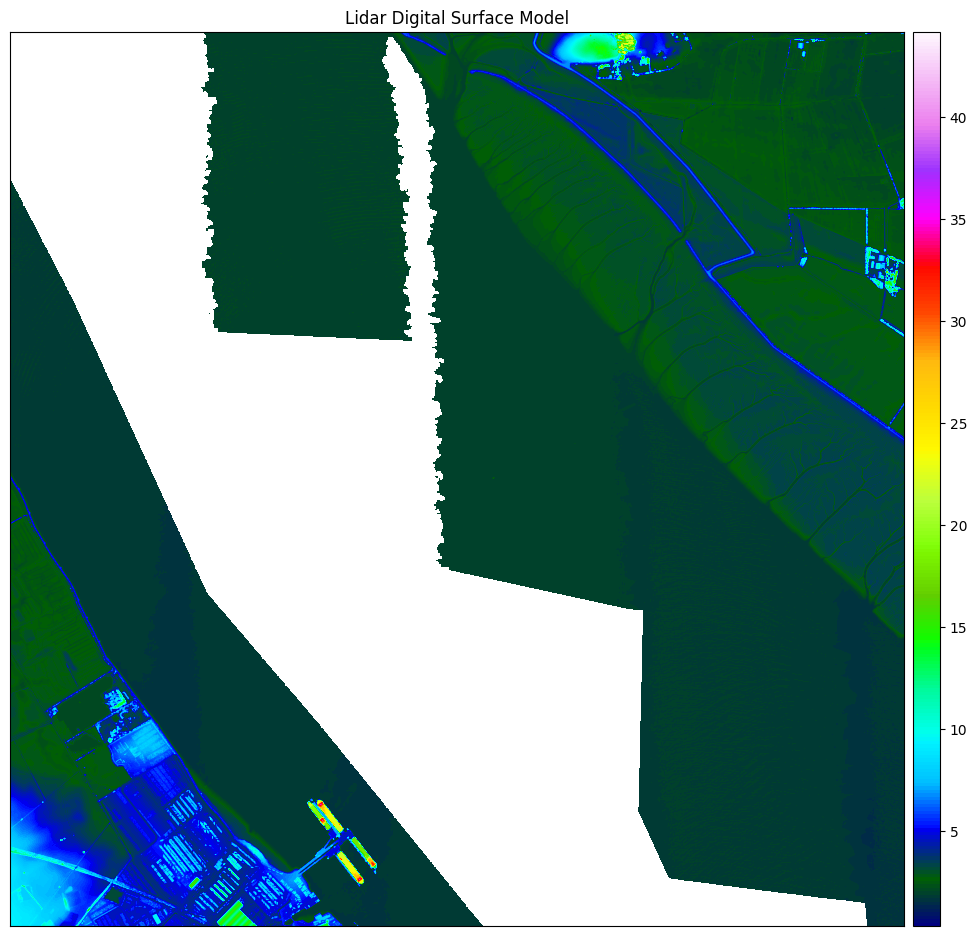

In [61]:
ep.plot_bands(lidar_dsm,
              scale=False,
              cmap='gist_ncar',
              title="Lidar Digital Surface Model")
plt.show()

In [66]:
# Translate a raster to a numpy point cloud.
translator = lio.Translator("geotiff", "np")
point_cloud = translator.translate("/content/TA12se_FZ_DSM_1m.tif")
pc = point_cloud

# point_cloud: np.array([...])

In [67]:
pc

array([[5.16047500e+05, 4.24999500e+05, 2.04999995e+00],
       [5.16048500e+05, 4.24999500e+05, 2.00999999e+00],
       [5.16049500e+05, 4.24999500e+05, 1.97999990e+00],
       ...,
       [5.19997500e+05, 4.20000500e+05, 1.65999997e+00],
       [5.19998500e+05, 4.20000500e+05, 1.64999998e+00],
       [5.19999500e+05, 4.20000500e+05, 1.64999998e+00]])

In [76]:
# Sample array
arr = np.array([pc])

# Save array to a binary file
np.save('array_data.npy', arr)

TypeError: ignored

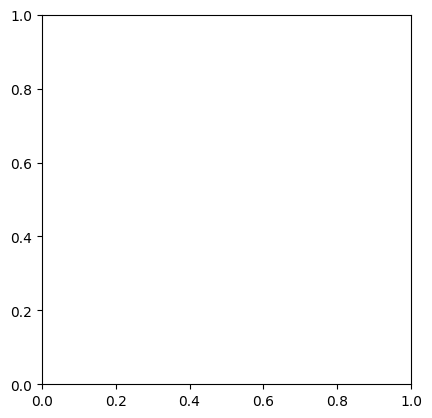

In [90]:
# Sample array representing a map (replace this with your data)
map_data = np.random.rand(1, 5000, 5000)  # Replace with your map array

# Plot the map using Matplotlib
plt.imshow(map_data, cmap='viridis')  # Choose a colormap ('viridis', 'gray', 'jet', etc.)
plt.colorbar()  # Add a color bar for reference
plt.title('Map Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.zlabel('Z-axis')
plt.show()